In [19]:
from nilearn.datasets import load_sample_motor_activation_image
import matplotlib.pyplot as plt

#stat_img = load_sample_motor_activation_image()

In [20]:
stat_img = '/media/neel/MOUS/MOUS/MOUS/SPM_results/second_level/SPM-V_II/spmT_0001.nii'

In [21]:
from nilearn.datasets import load_fsaverage

fsaverage_meshes = load_fsaverage()

In [22]:
from nilearn.surface import SurfaceImage

surface_image = SurfaceImage.from_volume(
    mesh=fsaverage_meshes["pial"],
    volume_img=stat_img,
)

In [23]:
import numpy as np

from nilearn.datasets import load_fsaverage_data

curv_sign = load_fsaverage_data(data_type="curvature")
for hemi, data in curv_sign.data.parts.items():
    curv_sign.data.parts[hemi] = np.sign(data)

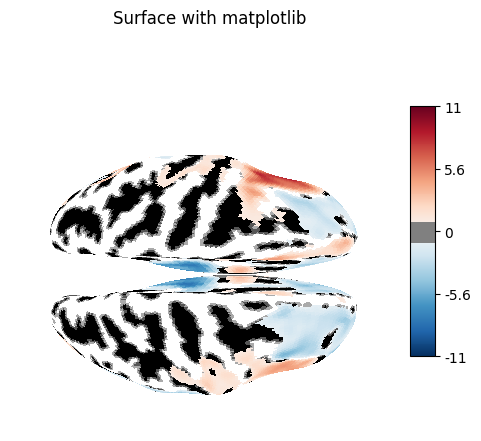

In [24]:
from nilearn.plotting import plot_surf_stat_map

# In this example we will plot both hemispheres, but you can choose one of
# "left", "right" or "both".
hemi = "both"

fig = plot_surf_stat_map(
    stat_map=surface_image,
    surf_mesh=fsaverage_meshes["inflated"],
    hemi=hemi,
    title="Surface with matplotlib",
    threshold=1.0,
    bg_map=curv_sign,
    darkness=None,
)
fig.show()

Using plotting engine matplotlib.


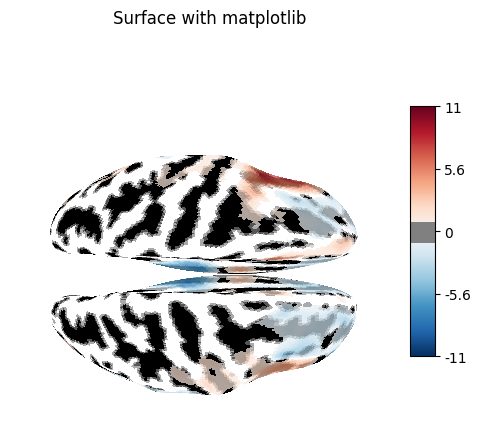

In [16]:
engine = "matplotlib"

# uncomment the following line if you use plotly
# in the rest of this example

# engine = "plotly"

print(f"Using plotting engine {engine}.")

figure = plot_surf_stat_map(
    stat_map=surface_image,
    surf_mesh=fsaverage_meshes["inflated"],
    hemi=hemi,
    title=f"Surface with {engine}",
    threshold=1.0,
    bg_map=curv_sign,
    bg_on_data=True,
    engine=engine,  # Specify the plotting engine here
    darkness=None,
)

# Uncomment the line below
# to view the figure in browser.
figure.show()

In [17]:
from nilearn.datasets import fetch_surf_fsaverage

# See docstring
help(fetch_surf_fsaverage)

Help on function fetch_surf_fsaverage in module nilearn.datasets.struct:

fetch_surf_fsaverage(mesh='fsaverage5', data_dir=None)
    Download a Freesurfer fsaverage surface.
    
    File names are subject to change and only attribute names
    are guaranteed to be stable across nilearn versions.
    See :footcite:t:`Fischl1999`.
    
    See :func:`~nilearn.datasets.load_fsaverage` and
    :func:`~nilearn.datasets.load_fsaverage_data`
    to access fsaverage data as :obj:`~nilearn.surface.SurfaceImage`.
    
    Parameters
    ----------
    mesh : :obj:`str`, default='fsaverage5'
        Which :term:`mesh` to fetch.
        Should be one of the following values:
        
    
        - ``"fsaverage3"``: the low-resolution fsaverage3 mesh (642 nodes)
        - ``"fsaverage4"``: the low-resolution fsaverage4 mesh (2562 nodes)
        - ``"fsaverage5"``: the low-resolution fsaverage5 mesh (10242 nodes)
        - ``"fsaverage6"``: the medium-resolution fsaverage6 mesh (40962 nodes)
     

In [18]:
#Downloading the surface.
from templateflow.api import get, templates

# 1. Get the MNI152NLin6Asym T1w volume
vol = get('MNI152NLin6Asym', suffix='T1w', resolution=1, desc=None, extension='nii.gz')

# 2. Get fsaverage or fsLR *surface* aligned to MNI152NLin6Asym
#    TemplateFlow doesn't store MNI-native surfaces,
#    so you fetch an MNI-aligned fsLR (for example):
surf_lh = get('fsLR', density='32k', hemi='L')
surf_rh = get('fsLR', density='32k', hemi='R')